# CMSC 35440 Machine Learning in Biology and Medicine
## Homework 2: Molecular Subtyping of Lung Cancer
**Released**: Jan 28, 2025

**Due**: Feb 7, 2025 at 11:59 PM Chicago Time on Gradescope

**In the second homework, you'll explore embeddings of genomic expression data for two related cancer types.**

Lung adenocarcinoma and lung squamous cell carcinoma are the 2 most prevalent non-small cell lung cancer (NSCLC) types. They are related but distinct cancer types. Lung squamous cell carcinoma is the most common tumor in male smokers and occurs more centrally in the lung (closer to the root of the lung, nearer to the bronchi). Lung adenocarcinoma is the most common tumor in nonsmokers and female smokers and occurs more peripherally in the lung (closer to the sides of the lung, further from the bronchi). Hopefully this diagram of lung anatomy helps clarify the locations mentioned: https://en.wikipedia.org/wiki/Lung#/media/File:Illu_bronchi_lungs.jpg.

However, there are often exceptions to these epidemiological and anatomical patterns. This is why obtaining a histological (tissue slides) or molecular (e.g. gene expression) profile of a patient's specific cancer is vital for accurate diagnosis and subsequent treatment. But even molecular patterns of cancer can be heterogeneous. In this homework, you'll explore some of that heterogeneity and observe how models can get things wrong.

Last, you'll practice a vital step for biomedical machine learning: expert review. Before these models can ever be deployed in real patient settings, they must undergo rigorous review. In the US, any medical products intended for patient usage must be approved by the FDA. An excellent historical case of demonstrating why we need such review is Thalidomide in the late 1950s. It was originally marketed in Europe as a treatment for morning sickness, especially during pregnancy. However, the drug was blocked in the US by an expert reviewer at the FDA, [Dr. Frances Kelsey](https://en.wikipedia.org/wiki/Frances_Oldham_Kelsey) (a UChicago MD/PhD alum!), who was concerned over the lack of evidence concerning the drug's safety. She was of course right to be concerned, as Thalidomide was shown to cause severe birth defects, leading to its removal from European markets. Suffice to say, expert review is crucial to patient safety, especially as we dive into this new age of AI/ML in medicine.

The starter notebook for this homework can be downloaded from GitHub:

https://github.com/StevenSong/CMSC-35440-Source/blob/main/hw2/CMSC_35440_HW2_Student_Version.ipynb


## Instructions


1. Download and open the starter notebook. No need for any GPUs for this homework.
1. Download and unzip the data. We've provided gene expression data spanning 2 TCGA projects: `TCGA-LUAD` (lung adenocarcinoma) and `TCGA-LUSC` (lung squamous cell carcinoma). For simplicity, we'll use the project ID to distinguish the cancer type.
  * We've provided the data as a tarball that be downloaded from [https://github.com/StevenSong/CMSC-35440-Source/releases/download/hw2/hw2.tar.gz](https://github.com/StevenSong/CMSC-35440-Source/releases/download/hw2/hw2.tar.gz).
  * After unzipping the data, there should be a CSV of metadata, a folder of expression TSV files, and the code that was used to originally download the data. You don't need the download code but it can be a good template if you want to pull other data from the NCI GDC.
1. Using the expression data, derive one expression vector per unique patient (given by the `case_id`). We'll treat this as our patient embedding.
  * **Only use the `protein_coding` genes within each expression file.**
  * **Only use the count columns which contain the string `unstranded`.**
  * One challenge of working with real biomedical data is that each patient may contribute a variable number of samples, for example if multiple biopsies are taken. For this homework, we're looking for one patient embedding aggregated from all of the patient's samples. **The exact aggregation method is up to you.**
  * Don't forget to normalize the counts. You can refer to the slides from lecture on popular normalization methods. The normalizations that are precomputed by the GDC are also documented [here](https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/Expression_mRNA_Pipeline/#mrna-expression-transformation). **The exact normalization method is up to you.**
  * Include in your writeup a brief description and justification of the methods you used for normalization & aggregation and in what order you applied them.
  * Tips:
    * Beware the extra rows present in each count file e.g. `N_unmapped`, `N_multimapping`, etc.
    * Gene expression counts are naturally stored as a matrix where the columns are genes, the rows are individual samples, and the matrix values are the counts. In python, `scanpy` and `anndata` are packages used to handle and transform such data. You do not have to use either, but these may be useful.
1. Cluster your embeddings to 2 clusters. We're trying to derive a model which can distinguish the different lung cancer types. Simple `KMeans` from `sklearn` is fine for this. Derive cluster IDs for each sample.
1. Use PCA to reduce your embeddings to 2 dimensions.
1. Visualize your embeddings. We're looking for a scatter plot where the color of the points differ by the TCGA project (`LUAD` vs `LUSC`) and the shape of the points differ by the cluster ID assigned by clustering.
1. Consider these questions (you should probably address some of these in your writeup):
  * In the 2D projection of the embeddings, is there a natural decision boundary you would be able to draw to classify the different cancer types?
  * Are there samples which are misclassified by this decision boundary?
  * How close is clustering to this decision boundary?
  * Are there samples which are misclassified by clustering?
  * Are misclassifications by the model (either clustering or the imagined decision boundary) actually mislabeled data? For example, if a sample is labeled as lung adenocarcinoma but the model thinks it's lung squamous cell carcinoma, is the model right or is the label right?
1. Review the misclassifications:
  * We'll use another data modality to double check if the samples are labeled correctly. The imaging data for select TCGA lung cancer cases are available The Cancer Imaging Archive (TCIA).
  * Lung cancer patients often undergo computed tomography (CT) scans to identify the tumor. Additionally, these CTs are done in parallel to positron emission tomography (PET) scans. PET scans work by introducing a radioactive tracer that is taken up by metabolically active tissues, such as tumors. As a result, **tumors light up brighter white on PET scans**.
  * CT images are slices through the body going from head to toe. To understand the way each image is oriented, imagine you're looking through the feet of a person lying facing up on a table. This means that in each image, the top of the image is the patient's front, the bottom is their back, and the left of the image is the patient's right and vice versa. The images start at the patient's head so as you scroll through the images, you're looking further down the patient's body.
    * It's recommended to use the up/down arrow keys to scroll through the images.
  * For this exercise, we'll provide two cases which were misclassified by our implementation. You're welcome to check cases from your implementation, however not all cases have paired imaging data available ([LUAD cases](https://nbia.cancerimagingarchive.net/nbia-search/?CollectionCriteria=TCGA-LUAD), [LUSC cases](https://nbia.cancerimagingarchive.net/nbia-search/?CollectionCriteria=TCGA-LUSC)).
    * `TCGA-60-2715`: labeled as `LUSC` but classified by our model as `LUAD`.
      * Scroll through images 109 through 113. Look for the bright white spot in these images on the PET scan.
      * [CT scan](https://nbia.cancerimagingarchive.net/viewer/?study=1.3.6.1.4.1.14519.5.2.1.3023.4012.507148485748821590204034796320&series=1.3.6.1.4.1.14519.5.2.1.3023.4012.313155987490130625808038798781)
      * [PET scan](https://nbia.cancerimagingarchive.net/viewer/?study=1.3.6.1.4.1.14519.5.2.1.3023.4012.507148485748821590204034796320&series=1.3.6.1.4.1.14519.5.2.1.3023.4012.613169434607414222857186346352)
    * `TCGA-50-6590`: labeled as `LUAD` but classified by our model as `LUSC`.
      * Scroll through images 78 through 85. Look for the bright white spot in these images on the PET scan.
      * [CT scan](https://nbia.cancerimagingarchive.net/viewer/?study=1.3.6.1.4.1.14519.5.2.1.6450.9002.125969062420301466106414902377&series=1.3.6.1.4.1.14519.5.2.1.6450.9002.216176897913679442475013148754)
      * [PET scan](https://nbia.cancerimagingarchive.net/viewer/?study=1.3.6.1.4.1.14519.5.2.1.6450.9002.125969062420301466106414902377&series=1.3.6.1.4.1.14519.5.2.1.6450.9002.321022540475237033558410330699)
  * Without much background, it is probably much easier to see the tumor as the brightly lit up white spot on the PET scan. However, it's easier to appreciate finer detail on the CT scan. Try to find the tumor on the CT using the PET scan to get the rough location of the tumor. The image indices are the same on both.
  * Using the anatomical descriptions of lung adenocarcinoma and lung squamous cell carcinoma provided in the intro of this assignment, does it look like the labels for these cases are correct?
1. Writeup your work, your writeup should be 1 to 2 pages long, excluding figures. 12pt font, single space, 1 inch margins, letter size paper. Please submit either a PDF or a Word document. Make sure to include the following:
  * Your embedding visualization.
  * A brief justification for the normalization & aggregation method and the order in which you applied them.
  * A discussion of some of the above questions regarding identified misclassifications via visualization and clustering.
  * A discussion of manual review of the the misclassified cases.
  * A discussion on the question: Why is review by an expert important? Phrased another way, why should someone with domain knowledge review models?
1. Submit your homework. Make sure to include:
  1. Your writeup containing a figure with your embedding visualization.
  1. Your notebook with your code.


## Code

In [1]:
!pip install scanpy
!wget https://github.com/StevenSong/CMSC-35440-Source/releases/download/hw2/hw2.tar.gz
!tar -xzf hw2.tar.gz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=67e6aef8b0537a67c37ccf5e72fe20d644b465ae96a705b441aa702d7fdf4319
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info
--2025-02-07 21:13:03--  https://github.com/StevenSong/CMSC-35440-Source/releases/download/hw2/hw2.tar.gz
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.c

In [25]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import zscore
from sklearn.cluster import KMeans

expression_dir = '/content/hw2/data/'

In [13]:
df_meta = pd.read_csv('hw2/metadata.csv')
df_meta.head()

,file_id,file_name,case_id,sample_id,portion_id,analyte_id,aliquots_id,project_id
0,4236170e-67b4-4bd7-badd-4fcba557d0e3,6df80c92-775e-4bcf-b2c7-6cbd7e147447.rna_seq.a...,TCGA-43-7657,TCGA-43-7657-01A,TCGA-43-7657-01A-31,TCGA-43-7657-01A-31R,TCGA-43-7657-01A-31R-2125-07,TCGA-LUSC
1,7da3a15e-9911-4429-98e7-d7ee03d7ad7f,ef697db7-3b14-4999-9e9b-85c37718f615.rna_seq.a...,TCGA-60-2695,TCGA-60-2695-01A,TCGA-60-2695-01A-01,TCGA-60-2695-01A-01R,TCGA-60-2695-01A-01R-0851-07,TCGA-LUSC
2,0f3755ec-9e0e-4fc9-ae14-a32d6b486a7e,b1361753-6f8c-4038-addb-9e4767ca627c.rna_seq.a...,TCGA-21-1070,TCGA-21-1070-01A,TCGA-21-1070-01A-01,TCGA-21-1070-01A-01R,TCGA-21-1070-01A-01R-0692-07,TCGA-LUSC
3,94cab1e2-dcd6-43b7-b359-75b0c4a485ba,23f1ad0c-c9d5-408f-bba8-1bb71364007b.rna_seq.a...,TCGA-94-7033,TCGA-94-7033-01A,TCGA-94-7033-01A-11,TCGA-94-7033-01A-11R,TCGA-94-7033-01A-11R-1949-07,TCGA-LUSC
4,7909042c-47f9-4f3a-9591-71f8856a571d,0648c653-891f-4202-8d83-59be8fc5e80c.rna_seq.a...,TCGA-68-8250,TCGA-68-8250-01A,TCGA-68-8250-01A-11,TCGA-68-8250-01A-11R,TCGA-68-8250-01A-11R-2296-07,TCGA-LUSC


In [18]:
all_counts = []

for i in tqdm(range(len(df_meta))):
  df_temp = pd.read_csv(expression_dir + df_meta.iloc[i]['file_name'], sep='\t', skiprows=1)

  df_temp = df_temp[df_temp['gene_type'] == 'protein_coding'][['gene_id', 'unstranded']]
  df_temp['case_id'] = df_meta.iloc[i]['case_id']
  df_temp['project_id'] = df_meta.iloc[i]['project_id']

  df_temp['unstranded'] = df_temp['unstranded'].astype(int)

  all_counts.append(df_temp)

df_counts = pd.concat(all_counts, ignore_index=True)

 12%|█▏        | 129/1041 [00:22<02:27,  6.17it/s]<ipython-input-18-94617d1856e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['case_id'] = df_meta.iloc[i]['case_id']
<ipython-input-18-94617d1856e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['project_id'] = df_meta.iloc[i]['project_id']
<ipython-input-18-94617d1856e6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [57]:
df_update = df_counts.groupby(["case_id", "gene_id"], as_index=False)['unstranded'].mean() # take average value if multiple biopsies
df_expression = df_update.pivot(index='case_id', columns='gene_id', values='unstranded').fillna(0)
df_expression.head()

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288649.1,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
case_id,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244,5001.0,0.0,1452.0,1308.0,789.0,1963.0,2969.0,2907.0,2654.0,2794.0,...,0.0,0.0,2.0,66.0,0.0,0.0,0.0,0.0,25.0,17.0
TCGA-05-4249,4383.0,0.0,2006.0,1632.0,482.0,1209.0,2742.0,2350.0,1317.0,6278.0,...,0.0,0.0,0.0,15.0,1.0,0.0,0.0,0.0,18.0,17.0
TCGA-05-4250,5316.0,5.0,2886.0,631.0,716.0,1468.0,4517.0,3308.0,2405.0,3299.0,...,0.0,0.0,1.0,196.0,1.0,0.0,1.0,0.0,2.0,7.0
TCGA-05-4382,3887.0,0.0,2823.0,1024.0,724.0,4651.0,8650.0,5798.0,5026.0,3657.0,...,0.0,0.0,0.0,86.0,1.0,0.0,1.0,0.0,11.0,28.0
TCGA-05-4384,1343.0,0.0,907.0,823.0,189.0,1047.0,1521.0,1098.0,5594.0,1154.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,8.0,8.0


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_expression), columns=df_expression.columns, index=df_expression.index)

In [68]:
kmeans = KMeans(n_clusters=2, random_state=32200)
# model classification
df_normalized['cluster_id'] = kmeans.fit_predict(df_normalized)

In [69]:
# merge groundtruth classification
df_gt = pd.DataFrame(index=df_normalized.index)
df_gt['case_id'] = df_normalized.index
df_gt['cluster_id'] = df_normalized['cluster_id']
for idx in df_gt.index:
  temp = df_meta.loc[df_meta['case_id'] == idx, 'project_id'].values
  df_gt.loc[idx, 'project_id'] = temp[0]
df_gt.head()

,case_id,cluster_id,project_id
case_id,,,
TCGA-05-4244,TCGA-05-4244,1,TCGA-LUAD
TCGA-05-4249,TCGA-05-4249,1,TCGA-LUAD
TCGA-05-4250,TCGA-05-4250,1,TCGA-LUAD
TCGA-05-4382,TCGA-05-4382,1,TCGA-LUAD
TCGA-05-4384,TCGA-05-4384,0,TCGA-LUAD


In [70]:
# PCA to reduce embeddings to two dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2'], index=df_normalized.index)
df_gt['PC1'] = df_pca['PC1']
df_gt['PC2'] = df_pca['PC2']
df_gt.head()

,case_id,cluster_id,project_id,PC1,PC2
case_id,,,,,
TCGA-05-4244,TCGA-05-4244,1,TCGA-LUAD,5.359682,-4.986042
TCGA-05-4249,TCGA-05-4249,1,TCGA-LUAD,6.577535,-5.333750
TCGA-05-4250,TCGA-05-4250,1,TCGA-LUAD,4.622764,-1.363262
TCGA-05-4382,TCGA-05-4382,1,TCGA-LUAD,15.094914,-6.234366
TCGA-05-4384,TCGA-05-4384,0,TCGA-LUAD,-6.285911,-2.765295


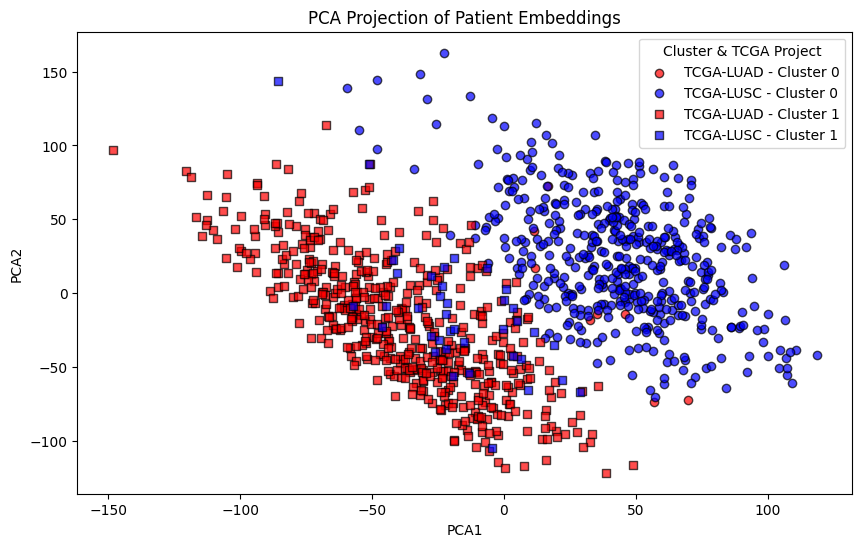

In [66]:
import matplotlib.pyplot as plt

markers = {0: "o", 1: "s"}  # Circle for cluster 0, Square for cluster 1
colors = {"TCGA-LUAD": "red", "TCGA-LUSC": "blue"}  # LUAD = Red, LUSC = Blue

fig, ax = plt.subplots(figsize=(10, 6))

for cluster_id, marker in markers.items():
    for project_id, color in colors.items():
        subset = df_gt[(df_gt["cluster_id"] == cluster_id) & (df_gt["project_id"] == project_id)]
        ax.scatter(
            subset["PC1"],
            subset["PC2"],
            c=color,
            marker=marker,
            label=f"{project_id} - Cluster {cluster_id}",
            alpha=0.7,
            edgecolors="k",
        )

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA Projection of Patient Embeddings")
plt.legend(title="Cluster & TCGA Project")
plt.show()
